<a href="https://colab.research.google.com/github/Mamatha22mh1a4249/DeepLearning-Lab/blob/main/experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=30000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
maxlen=500
X_train=pad_sequences(X_train,maxlen=maxlen)
X_test=pad_sequences(X_test,maxlen=maxlen)

In [4]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=256)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5047 - loss: 813.3904 - val_accuracy: 0.4982 - val_loss: 29.5431
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4931 - loss: 100.0582 - val_accuracy: 0.5006 - val_loss: 0.9354
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5018 - loss: 14.6608 - val_accuracy: 0.5022 - val_loss: 0.7642
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5058 - loss: 5.7007 - val_accuracy: 0.4961 - val_loss: 0.7721
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5046 - loss: 3.9950 - val_accuracy: 0.4980 - val_loss: 0.7758
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4979 - loss: 2.3970 - val_accuracy: 0.5016 - val_loss: 0.7028
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5017 - loss: 1.9570 - val_accuracy: 0.5050 - val_loss: 0.7120
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5001 - loss: 1.8261 - val_accuracy: 0.5040 - v

In [7]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.02%


In [8]:
from sklearn.metrics import classification_report
y_pred=(model.predict(X_test)>0.5).astype("int32")
print(classification_report(y_test,y_pred,target_names=['negative','positive']))


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67     12500
    positive       0.61      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.55      0.50      0.33     25000
weighted avg       0.55      0.50      0.33     25000



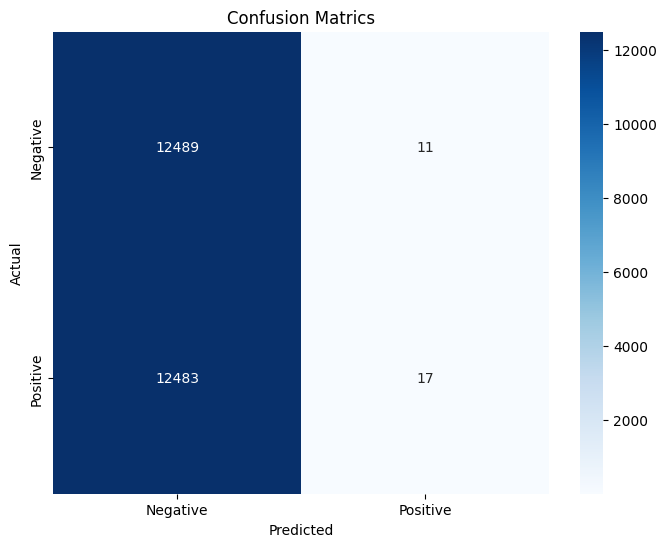

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrics")
plt.show()